In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime

In [ ]:
path = '/content/drive/MyDrive/MSML_612_project/data/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Patapsco @ Castonsvill, MD

In [ ]:
# gage height in ft
# discharge df^3/s

columns_patapsco_cat = ['agency_cd','site_no',	'datetime','tz_cd', 
                        'gage_height_patapsco (catonsville)',	'gage_height_cd',	
                        'discharge_patapsco (catonsville)','discharge_cd']

In [ ]:
patapsco_cat = pd.read_csv(path+'patapsco_cat.txt',sep='\t')
patapsco_cat.columns = columns_patapsco_cat 

patapsco_cat

,agency_cd,site_no,datetime,tz_cd,gage_height_patapsco (catonsville),gage_height_cd,discharge_patapsco (catonsville),discharge_cd
0,USGS,1589025,2010-10-01 01:15,EDT,14.50,A,1940.0,A
1,USGS,1589025,2010-10-01 01:30,EDT,14.45,A,1900.0,A
2,USGS,1589025,2010-10-01 01:45,EDT,14.34,A,1810.0,A
3,USGS,1589025,2010-10-01 02:00,EDT,14.21,A,1710.0,A
4,USGS,1589025,2010-10-01 02:15,EDT,14.09,A,1620.0,A
...,...,...,...,...,...,...,...,...
372894,USGS,1589025,2021-08-04 18:30,EDT,10.40,P,68.4,P
372895,USGS,1589025,2021-08-04 18:45,EDT,10.39,P,67.3,P
372896,USGS,1589025,2021-08-04 19:00,EDT,10.40,P,68.4,P
372897,USGS,1589025,2021-08-04 19:15,EDT,10.40,P,68.4,P


In [ ]:
# handling missing data aka the NaNs

for column in patapsco_cat.columns:
  index = patapsco_cat.loc[pd.isna(patapsco_cat[column]), :].index #returns a list of indices for cells == nan in df[column]
  for i in index:
    patapsco_cat[column][i] = patapsco_cat[column][i-1] #appending cells == nan with values of their previous cells

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
patapsco_cat['datetime'] = pd.to_datetime(patapsco_cat['datetime'])

patapsco_cat

,agency_cd,site_no,datetime,tz_cd,gage_height_patapsco (catonsville),gage_height_cd,discharge_patapsco (catonsville),discharge_cd
0,USGS,1589025,2010-10-01 01:15:00,EDT,14.50,A,1940.0,A
1,USGS,1589025,2010-10-01 01:30:00,EDT,14.45,A,1900.0,A
2,USGS,1589025,2010-10-01 01:45:00,EDT,14.34,A,1810.0,A
3,USGS,1589025,2010-10-01 02:00:00,EDT,14.21,A,1710.0,A
4,USGS,1589025,2010-10-01 02:15:00,EDT,14.09,A,1620.0,A
...,...,...,...,...,...,...,...,...
372894,USGS,1589025,2021-08-04 18:30:00,EDT,10.40,P,68.4,P
372895,USGS,1589025,2021-08-04 18:45:00,EDT,10.39,P,67.3,P
372896,USGS,1589025,2021-08-04 19:00:00,EDT,10.40,P,68.4,P
372897,USGS,1589025,2021-08-04 19:15:00,EDT,10.40,P,68.4,P


### Patapsco @ Elkridge, MD

In [ ]:
# gage height in ft
# discharge df^3/s

columns_patapsco_elk = ['agency_cd','site_no',	'datetime','tz_cd', 
                        'gage_height_patapsco (elkridge)',	'gage_height_cd',	
                        'discharge_patapsco (elkridge)','discharge_cd']

In [ ]:
patapsco_elk = pd.read_csv(path+'patapsco_elk.txt',sep='\t')
patapsco_elk.columns = columns_patapsco_elk 

patapsco_elk

,agency_cd,site_no,datetime,tz_cd,gage_height_patapsco (elkridge),gage_height_cd,discharge_patapsco (elkridge),discharge_cd
0,USGS,1589035,2010-10-09 00:15,EDT,4.98,A,NaN,NaN
1,USGS,1589035,2010-10-09 00:30,EDT,4.98,A,NaN,NaN
2,USGS,1589035,2010-10-09 00:45,EDT,4.98,A,NaN,NaN
3,USGS,1589035,2010-10-09 01:00,EDT,4.98,A,65.0,A
4,USGS,1589035,2010-10-09 01:15,EDT,4.98,A,65.0,A
...,...,...,...,...,...,...,...,...
454837,USGS,1589035,2021-08-04 20:00,EDT,5.54,P,71.2,P
454838,USGS,1589035,2021-08-04 20:15,EDT,5.54,P,71.2,P
454839,USGS,1589035,2021-08-04 20:30,EDT,5.54,P,71.2,P
454840,USGS,1589035,2021-08-04 20:45,EDT,5.54,P,71.2,P


In [ ]:
# handling missing data aka the NaNs

for column in patapsco_elk.columns:
  index = patapsco_elk.loc[pd.isna(patapsco_elk[column]), :].index #returns a list of indices for cells == nan in df[column]
  for i in index:
    if i == 0: # there is an nan @ index = 0, so [i-1] would not work
      # the first non-nan is at index = 3, hence [i+1]
      patapsco_elk[column][i] = patapsco_elk[column][i+3] #appending cells == nan with values of their previous cells
    else:
      patapsco_elk[column][i] = patapsco_elk[column][i-1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
patapsco_elk['datetime'] = pd.to_datetime(patapsco_elk['datetime'])

patapsco_elk

,agency_cd,site_no,datetime,tz_cd,gage_height_patapsco (elkridge),gage_height_cd,discharge_patapsco (elkridge),discharge_cd
0,USGS,1589035,2010-10-09 00:15:00,EDT,4.98,A,65.0,A
1,USGS,1589035,2010-10-09 00:30:00,EDT,4.98,A,65.0,A
2,USGS,1589035,2010-10-09 00:45:00,EDT,4.98,A,65.0,A
3,USGS,1589035,2010-10-09 01:00:00,EDT,4.98,A,65.0,A
4,USGS,1589035,2010-10-09 01:15:00,EDT,4.98,A,65.0,A
...,...,...,...,...,...,...,...,...
454837,USGS,1589035,2021-08-04 20:00:00,EDT,5.54,P,71.2,P
454838,USGS,1589035,2021-08-04 20:15:00,EDT,5.54,P,71.2,P
454839,USGS,1589035,2021-08-04 20:30:00,EDT,5.54,P,71.2,P
454840,USGS,1589035,2021-08-04 20:45:00,EDT,5.54,P,71.2,P


### NOAA Climate Data @ BWI, MD

In [ ]:
noaa_climate = pd.read_csv(path+'noaa_bwi.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (34,42,43,44,47,49,50,52,53,54,70,74,76,89,90) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
climate_columns = ['DATE','HourlyAltimeterSetting', 'HourlyDewPointTemperature', 
                   'HourlyDryBulbTemperature', 'HourlyPrecipitation',   
                   'HourlyRelativeHumidity', 
                   'HourlyStationPressure', 'HourlyVisibility', 
                   'HourlyWetBulbTemperature', 'HourlyWindDirection', 
                   'HourlyWindSpeed']

In [ ]:
df_climate = noaa_climate[climate_columns]

df_climate

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
0,2012-01-01T00:54:00,30.11,35,41,0.00,79,29.94,10.00,38,260,7.0
1,2012-01-01T01:00:00,NaN,35,41,NaN,79,29.90,9.94,38,260,7.0
2,2012-01-01T01:54:00,30.12,35,41,0.00,79,29.95,10.00,38,240,5.0
3,2012-01-01T02:54:00,30.12,34,39,0.00,82,29.95,10.00,37,000,0.0
4,2012-01-01T03:54:00,30.11,32,36,0.00,86,29.94,10.00,34,000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119469,2021-08-02T22:54:00,30.1,59,64,0.00,84,29.93,10.00,61,280,3.0
119470,2021-08-02T23:54:00,30.1,59,64,0.00,84,29.93,10.00,61,000,0.0
119471,2021-08-02T23:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119472,2021-08-03T00:54:00,30.09,59,63,NaN,87,29.92,10.00,61,270,3.0


In [ ]:
for column in climate_columns:
  index = df_climate.loc[pd.isna(df_climate[column]), :].index #returns a list of indices for cells == nan in df[column]
  for i in index:
    df_climate[column][i] = df_climate[column][i-1] #appending cells == nan with values of their previous cells

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_climate['DATE'] = pd.to_datetime(df_climate['DATE'])
df_climate 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
0,2012-01-01 00:54:00,30.11,35,41,0.00,79,29.94,10.00,38,260,7.0
1,2012-01-01 01:00:00,30.11,35,41,0.00,79,29.90,9.94,38,260,7.0
2,2012-01-01 01:54:00,30.12,35,41,0.00,79,29.95,10.00,38,240,5.0
3,2012-01-01 02:54:00,30.12,34,39,0.00,82,29.95,10.00,37,000,0.0
4,2012-01-01 03:54:00,30.11,32,36,0.00,86,29.94,10.00,34,000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
119469,2021-08-02 22:54:00,30.1,59,64,0.00,84,29.93,10.00,61,280,3.0
119470,2021-08-02 23:54:00,30.1,59,64,0.00,84,29.93,10.00,61,000,0.0
119471,2021-08-02 23:59:00,30.1,59,64,0.00,84,29.93,10.00,61,000,0.0
119472,2021-08-03 00:54:00,30.09,59,63,0.00,87,29.92,10.00,61,270,3.0


### Assembling all the data into the test-train set
> clipping timeseris for each datase

> timeframe being from 2018-04-01 00:00 to 2018-08-01 00:00



> climate data needs to begin at 2018-03-31 23:00 in order to include a time stamp within 30 min of 2018-04-01 00:00; otherwise, it begins at 2018-04-01 00:54





In [ ]:
# clipping each dataset based on the determined timeframe
# for the 2018 event

patapsco_cat = patapsco_cat[patapsco_cat['datetime'] >= '2018-05-22 00:00']
patapsco_cat = patapsco_cat[patapsco_cat['datetime'] <= '2018-05-30 00:00']
patapsco_cat.index = np.arange(0,len(patapsco_cat),1)

patapsco_elk = patapsco_elk[patapsco_elk['datetime'] >= '2018-05-22 00:00']
patapsco_elk = patapsco_elk[patapsco_elk['datetime'] <= '2018-05-30 00:00']
patapsco_elk.index = np.arange(0,len(patapsco_cat),1)

df_climate = df_climate[df_climate['DATE'] >= '2018-05-22 00:00']
df_climate = df_climate[df_climate['DATE'] <= '2018-05-30 00:00']
df_climate.index = np.arange(0,len(df_climate),1)

In [ ]:
# making a dataframe containing all the hydrologic data

df_hydro = pd.concat([patapsco_cat['datetime'],
                      patapsco_cat['discharge_patapsco (catonsville)'],
                      patapsco_cat['gage_height_patapsco (catonsville)'],
                      patapsco_elk['discharge_patapsco (elkridge)'],
                      patapsco_elk['gage_height_patapsco (elkridge)']],
                     axis=1)
                      

In [ ]:
df_hydro

,datetime,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge)
0,2018-04-01 00:00:00,124.0,10.91,136.0,5.60
1,2018-04-01 00:15:00,124.0,10.91,136.0,5.60
2,2018-04-01 00:30:00,124.0,10.91,136.0,5.60
3,2018-04-01 00:45:00,124.0,10.91,136.0,5.60
4,2018-04-01 01:00:00,124.0,10.91,134.0,5.59
...,...,...,...,...,...
11709,2018-07-31 23:00:00,564.0,14.72,610.0,7.49
11710,2018-07-31 23:15:00,564.0,14.72,614.0,7.50
11711,2018-07-31 23:30:00,558.0,14.72,606.0,7.48
11712,2018-07-31 23:45:00,558.0,14.72,606.0,7.48


In [ ]:
df_climate

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
0,2018-03-31 23:54:00,30.08,27,48,0.00,44,29.91,10.00,39,200,6.0
1,2018-03-31 23:59:00,30.08,27,48,0.00,44,29.91,10.00,39,200,6.0
2,2018-03-31 23:59:00,30.08,27,48,0.00,44,29.91,10.00,39,200,6.0
3,2018-04-01 00:54:00,30.06,29,46,0.00,51,29.89,10.00,39,210,3.0
4,2018-04-01 01:00:00,30.06,29,46,0.00,51,29.85,9.94,39,210,3.0
...,...,...,...,...,...,...,...,...,...,...,...
4358,2018-07-31 23:10:00,30.03,75,75,0.00,100,29.86,10.00,75,150,3.0
4359,2018-07-31 23:52:00,30.02,75,75,0.00,100,29.85,10.00,75,140,5.0
4360,2018-07-31 23:54:00,30.02,75,75,0.00,100,29.85,10.00,75,140,5.0
4361,2018-07-31 23:59:00,30.02,75,75,0.00,100,29.85,10.00,75,140,5.0


In [ ]:
climate_columns.remove('DATE')

In [ ]:
df = pd.DataFrame(columns=df_climate.columns)
df['DATE'] = pd.to_datetime(df_hydro['datetime'])

In [ ]:
new_columns = ['HourlyAltimeterSetting','HourlyDewPointTemperature',
               'HourlyDryBulbTemperature', 'HourlyPrecipitation',	
               'HourlyRelativeHumidity',	'HourlyStationPressure',	
               'HourlyVisibility']

In [ ]:
# matching climate data and hydrologic data

for c in new_columns:
  for i in df.index:
    for j in df_climate.index:
     
      t1 = abs(df['DATE'][i]-df_climate['DATE'][j])

      if t1 <= timedelta(minutes=30):
        df[c][i] = df_climate[c][j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
test_train = pd.concat([df_hydro,df[new_columns]],axis = 1)

In [ ]:
test_train

,datetime,discharge_patapsco (catonsville),gage_height_patapsco (catonsville),discharge_patapsco (elkridge),gage_height_patapsco (elkridge),HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility
0,2018-04-01 00:00:00,124.0,10.91,136.0,5.60,30.08,27,48,0.00,44,29.91,10.00
1,2018-04-01 00:15:00,124.0,10.91,136.0,5.60,30.08,27,48,0.00,44,29.91,10.00
2,2018-04-01 00:30:00,124.0,10.91,136.0,5.60,30.06,29,46,0.00,51,29.85,9.94
3,2018-04-01 00:45:00,124.0,10.91,136.0,5.60,30.06,29,46,0.00,51,29.85,9.94
4,2018-04-01 01:00:00,124.0,10.91,134.0,5.59,30.06,29,46,0.00,51,29.85,9.94
...,...,...,...,...,...,...,...,...,...,...,...,...
11709,2018-07-31 23:00:00,564.0,14.72,610.0,7.49,30.03,75,75,0.00,100,29.86,10.00
11710,2018-07-31 23:15:00,564.0,14.72,614.0,7.50,30.03,75,75,0.00,100,29.86,10.00
11711,2018-07-31 23:30:00,558.0,14.72,606.0,7.48,30.02,75,75,0.00,100,29.85,10.00
11712,2018-07-31 23:45:00,558.0,14.72,606.0,7.48,30.02,75,75,0.00,100,29.85,10.00


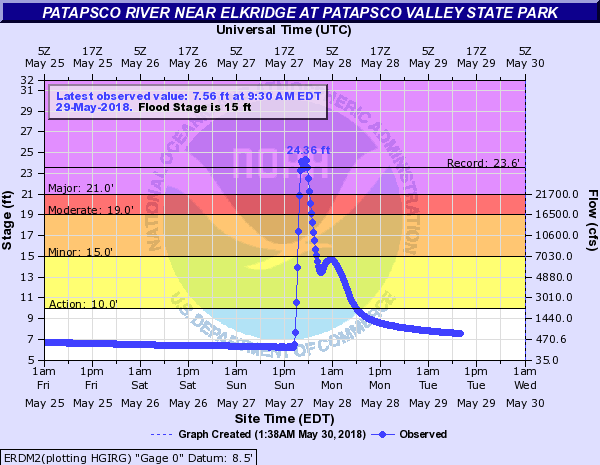

figure retrieved from  https://www.weather.gov/lwx/EllicottCityFlood2018 

In [ ]:
# the flood event was from 3 to 5 pm on 05/27/2018
# labeling time from 4 am 05/27/2018 to 3 pm 05/28/2018 as 'possitive for flood'

test_train['y'] = np.nan

for i in test_train.index:
  if test_train['datetime'][i] > datetime.fromisoformat('2018-05-27 03:45:00'):
    if test_train['datetime'][i] < datetime.fromisoformat('2018-05-28 15:15:00'):
      test_train['y'][i] = 1 # positive for flood event
  if test_train['datetime'][i] <= datetime.fromisoformat('2018-05-27 03:45:00'):
    test_train['y'][i] = 0 # negative for flood event
  if test_train['datetime'][i] >= datetime.fromisoformat('2018-05-28 15:15:00'):
    test_train['y'][i] = 0 # negative for flood event


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
test_train.to_csv(path+'test_train_2sites_1event.csv')